__DBLP__ is a computer science bibliography website. Starting in 1993 at Universität Trier in Germany, it grew from a small collection of HTML files and became an organization hosting a database and logic programming bibliography site. DBLP listed more than 5.4 million journal articles, conference papers, and other publications on computer science in December 2020, up from about 14,000 in 1995 and 3.66 million in July 2016.
In this notebook I'm retrieving data from dblp api and making various visualizations.

In [ ]:
import requests
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# 1. Creating the Data retrieval function

I'm creating a function that retrieves the title of each publication, the year and the type

In [7]:
def get_data(author_name):
    titles=[]
    years=[]
    types=[]
    base_url="https://dblp.org/search/publ/api"
    params={"q":author_name,"format":"json"}
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        publications = data.get('result', {}).get('hits', {}).get('hit', [])
        for pub in publications:
            info = pub.get('info', {})
            title = info.get('title')
            year = info.get('year')
            book_type=info.get("type")
            titles.append(title)
            years.append(year)
            types.append(book_type)
    d={"Title":titles,"Year":years,"Type":types}
    d=pd.DataFrame(data=d)
    return d
    
    

I am adding an extra column "Name", so I can separate publications by author later

In [10]:
vas_df=get_data("Vasileios Tenentes")
vas_df["Name"]="Vasileios Tenentes"
vas_df

,Title,Year,Type,Name
0,Multi-Vt-Based Energy Efficiency Optimization ...,2024,Journal Articles,Vasileios Tenentes
1,RTL Flow for the Power Side-Channel Resilience...,2024,Conference and Workshop Papers,Vasileios Tenentes
2,Evaluating Trusted Firmware Remote Attestation...,2024,Conference and Workshop Papers,Vasileios Tenentes
3,High Throughput and Energy Efficient SHA-2 ASI...,2023,Conference and Workshop Papers,Vasileios Tenentes
4,SiCBit-PUF: Strong in-Cache Bitflip PUF Comput...,2023,Conference and Workshop Papers,Vasileios Tenentes
5,MetaSPICE: Metaprogramming SPICE Framework for...,2023,Conference and Workshop Papers,Vasileios Tenentes
6,Design and Evaluation of a Peripheral for Inte...,2023,Conference and Workshop Papers,Vasileios Tenentes
7,Embedded Platforms for Trusted Edge Computing ...,2023,Conference and Workshop Papers,Vasileios Tenentes
8,REVOLVER: A Zero-Step Execution Emulation Fram...,2022,Conference and Workshop Papers,Vasileios Tenentes
9,Energy Efficient Speech Command Recognition fo...,2021,Conference and Workshop Papers,Vasileios Tenentes


In [12]:
emin_df=get_data("Emin Borandag")
emin_df["Name"]="Emin Borandag"
emin_df

,Title,Year,Type,Name
0,Development of majority vote ensemble feature ...,2021,Journal Articles,Emin Borandag
1,Majority vote feature selection algorithm in s...,2019,Journal Articles,Emin Borandag
2,Vehicle plate tracking system.,2018,Conference and Workshop Papers,Emin Borandag
3,TTC-3600: A new benchmark dataset for Turkish ...,2017,Journal Articles,Emin Borandag
4,Multi-level reranking approach for bug localiz...,2016,Journal Articles,Emin Borandag
5,A case study for the software size estimation ...,2016,Journal Articles,Emin Borandag
6,Regression Analysis Based Software Effort Esti...,2016,Journal Articles,Emin Borandag
7,The average scattering number of graphs.,2016,Journal Articles,Emin Borandag
8,Metin Madenciliği Kullanılarak Yazılım Kullanı...,2015,Conference and Workshop Papers,Emin Borandag
9,Yazılım Hata Kestiriminde Kolektif Sınıflandır...,2015,Conference and Workshop Papers,Emin Borandag


In [14]:
tony_df=get_data("Tony Fan")
tony_df["Name"]="Tony Fan"
tony_df

,Title,Year,Type,Name
0,Open X-Embodiment: Robotic Learning Datasets a...,2024,Conference and Workshop Papers,Tony Fan
1,A Critical Review on Hydrogen Production.,2023,Conference and Workshop Papers,Tony Fan
2,A Review of 5G Building Management Technologie...,2023,Conference and Workshop Papers,Tony Fan
3,A Critical Review on Smart Maintenance Decisio...,2022,Conference and Workshop Papers,Tony Fan
4,Development of Wasted Non-woven Fabric Mask (N...,2022,Conference and Workshop Papers,Tony Fan
5,Quantile-based fecal hemoglobin concentration ...,2019,Journal Articles,Tony Fan
6,Editorial TVLSI Positioning - Continuing and A...,2019,Journal Articles,Tony Fan
7,A Level Set Based Variational Principal Flow M...,2017,Journal Articles,Tony Fan
8,New region force for variational models in ima...,2017,Informal and Other Publications,Tony Fan
9,Guarantees of Riemannian Optimization for Low ...,2016,Journal Articles,Tony Fan


# 2.Visualizations per Author

First, I want to visualize the data of each author separately

### 2.1 Building the visualization function

In [362]:
def get_visualizations(df,author_name):
    pubs_per_year=df.groupby(["Year","Type"]).agg({"Title":"count"}).reset_index()
    pubs_per_type=df.groupby("Type").agg({"Title":"count"}).reset_index()
    bar= px.bar(pubs_per_year, x='Year', y='Title',title="{}'s publications per year".format(author_name),color="Type",barmode="group"
               ,labels={"Year":"Year","Title":"Number of Publications"})
    line=px.line(pubs_per_year,x="Year",y="Title",title="{}'s publications per year".format(author_name),
                labels={"Year":"Year","Title":"Number of Publications"})
    #pie=px.pie(pubs_per_type,values="Title",names="Type",title="Distribution of {}'s publications".format(author_name))
    pie=go.Figure(data=[go.Pie(labels=pubs_per_type["Type"],values=pubs_per_type["Title"],hole=0.3)])
    pie.update_layout(width=600,height=600,title="Distribution of {}'s publications".format(author_name))
    return bar,line,pie

### 2.2 Vasileios Tenentes

In [365]:
vas_bar,vas_line,vas_pie=get_visualizations(vas_df," Vasileios Tenentes")

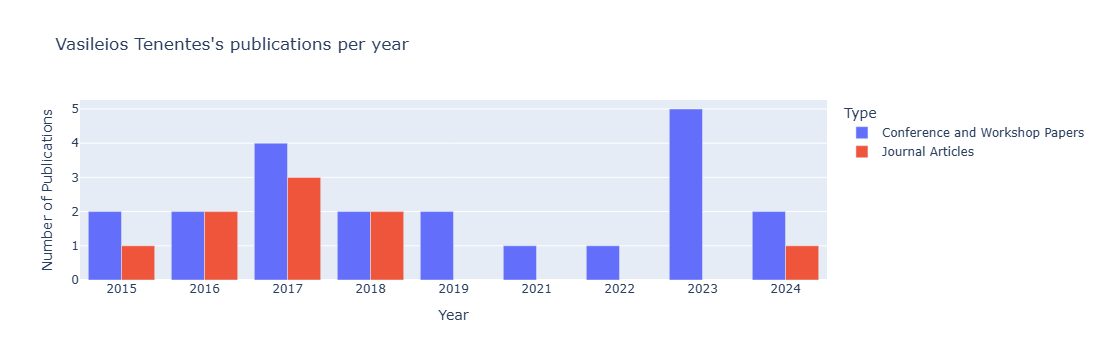

In [367]:
vas_bar.show()

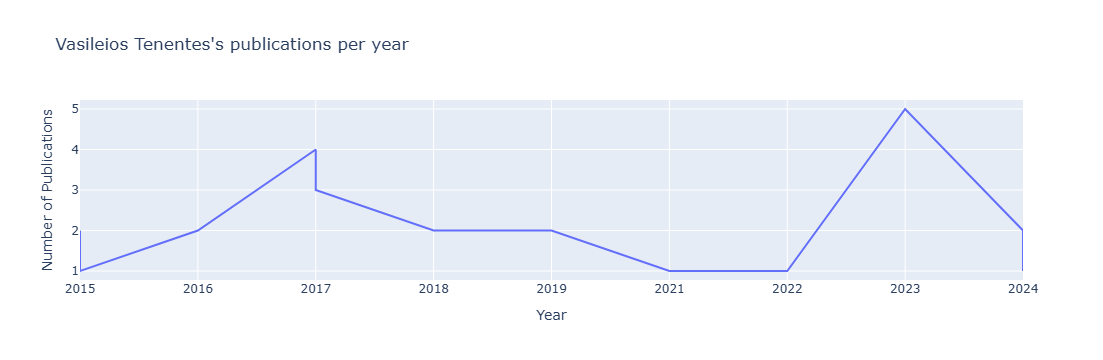

In [369]:
vas_line.show()

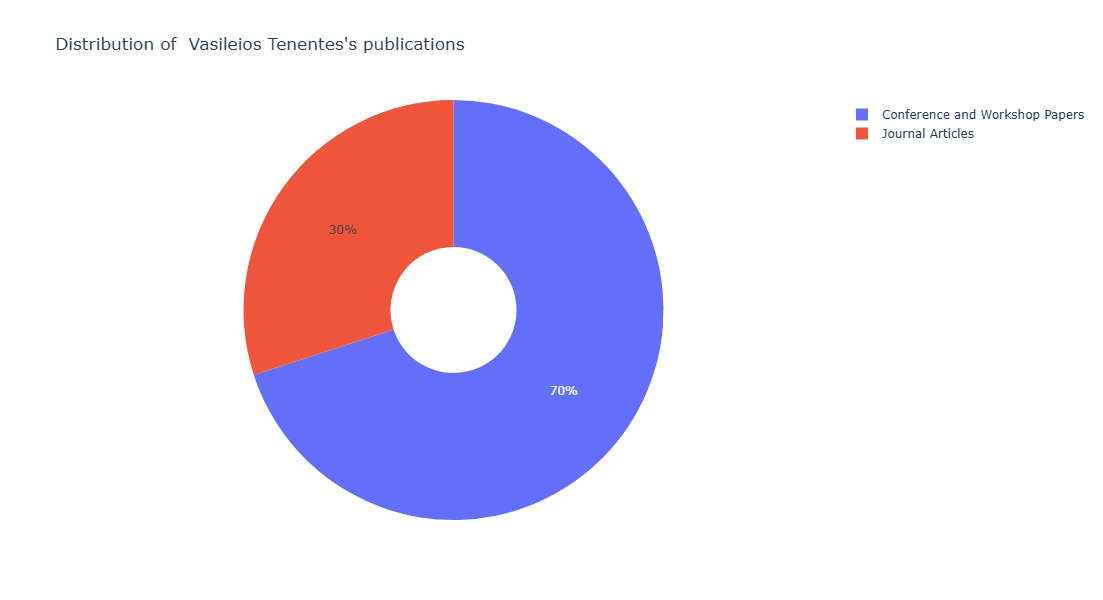

In [371]:
vas_pie.show()

### 2.3 Emin Borandag

In [374]:
e_bar,e_line,e_pie=get_visualizations(emin_df,"Emin Borandag")

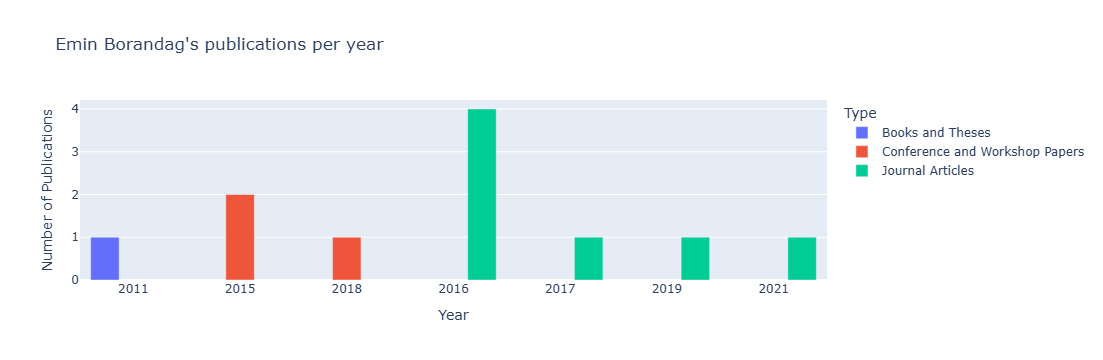

In [376]:
e_bar.show()

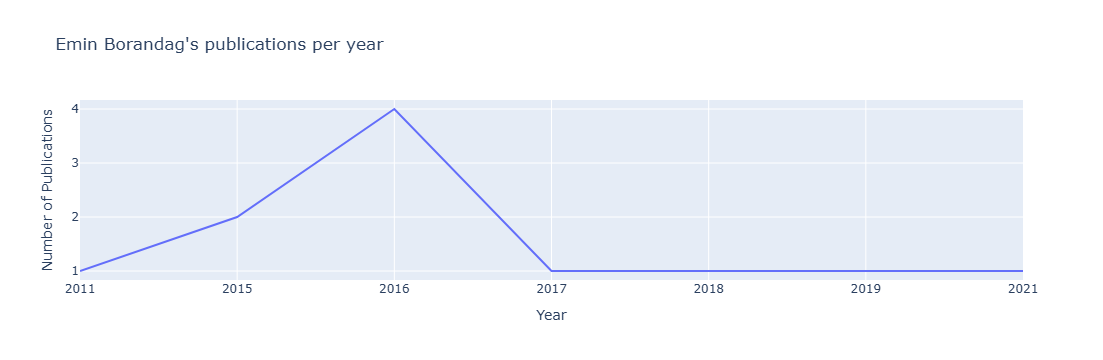

In [378]:
e_line.show()

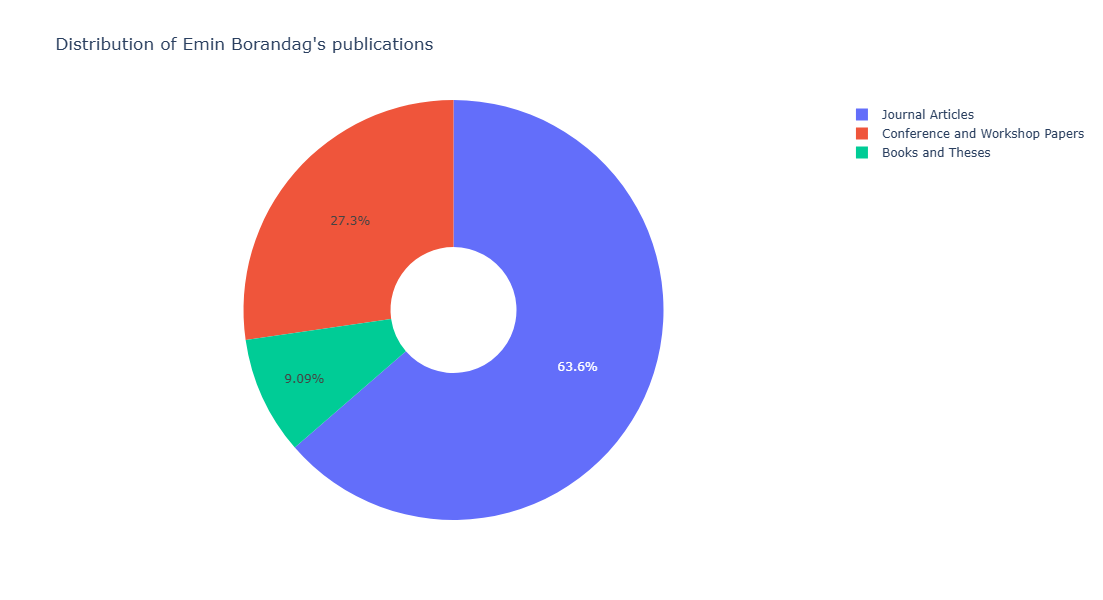

In [380]:
e_pie.show()

### 2.4 Tony Fan

In [383]:
tony_bar,tony_line,tony_pie=get_visualizations(tony_df,"Tony Fan")

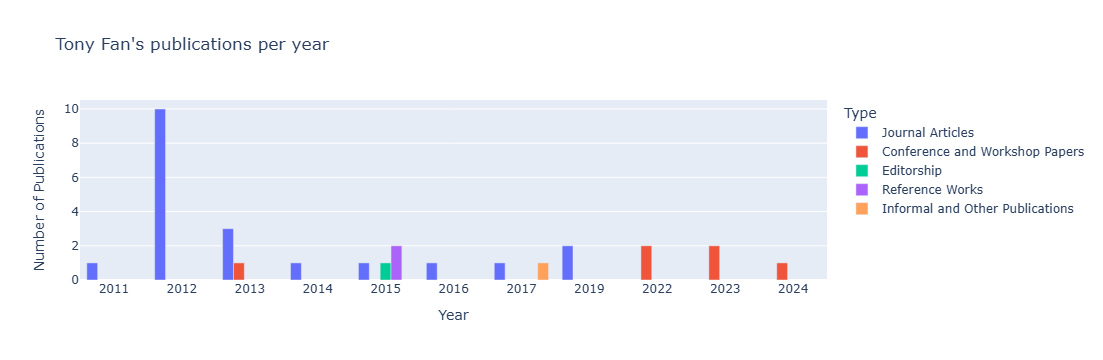

In [385]:
tony_bar.show()

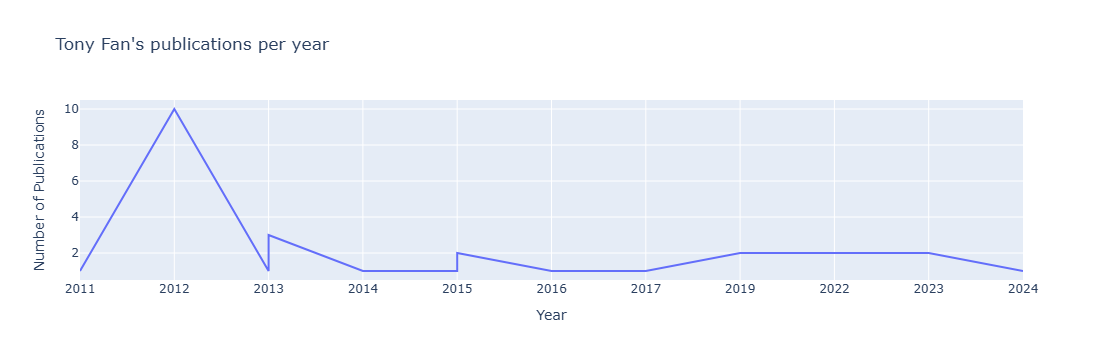

In [387]:
tony_line.show()

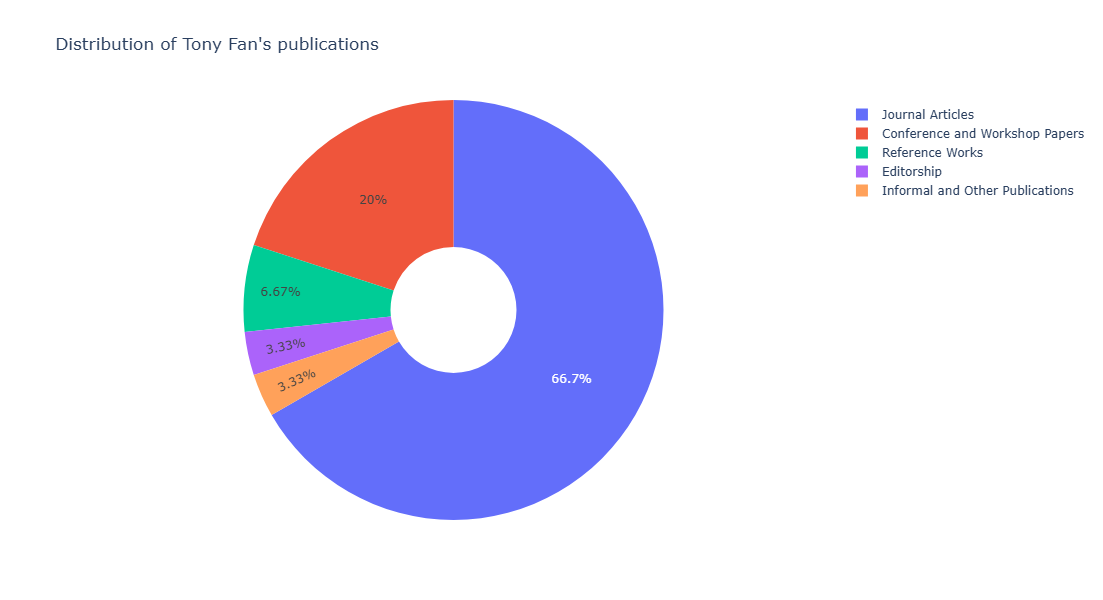

In [391]:
tony_pie.show()

# 3.Cummulative visualizations

Creating a function that takes as arguments the three dataframes,merges them into one dataframe and returns 3 plots

In [395]:
def cumm_visualizations(df1,df2,df3):
    cumm_df=pd.concat([df1,df2,df3],axis=0).reset_index()
    pubs_per_year=cumm_df.groupby(["Name","Year"]).agg({"Title":"count"}).reset_index()
    pubs_per_type=cumm_df.groupby(["Type","Name"]).agg({"Title":"count"}).reset_index()
    bar= px.bar(pubs_per_year, x='Year', y='Title',color="Name",title="Distribution of the Authors' publications per year",category_orders=
                {"Year": sorted(pubs_per_year['Year'])},labels={"Title":"Number of Publications"},barmode="group")
    line=px.line(pubs_per_year,x="Year",y="Title",color="Name",title="Evolution of the Authors' publications per year",category_orders=
                {"Year":sorted(pubs_per_year["Year"])})
    #pie=px.pie(pubs_per_type,values="Title",names="Type",title="Distribution of the Authors' publication types")
    pie=go.Figure(data=[go.Pie(labels=pubs_per_type["Type"],values=pubs_per_type["Title"],hole=0.3)])
    pie.update_layout(width=700,height=700,title="Distribution of the cummulative publications")
    return bar,line,pie
    

In [397]:
cumm_bar,cumm_line,cumm_pie=cumm_visualizations(vas_df,emin_df,tony_df)

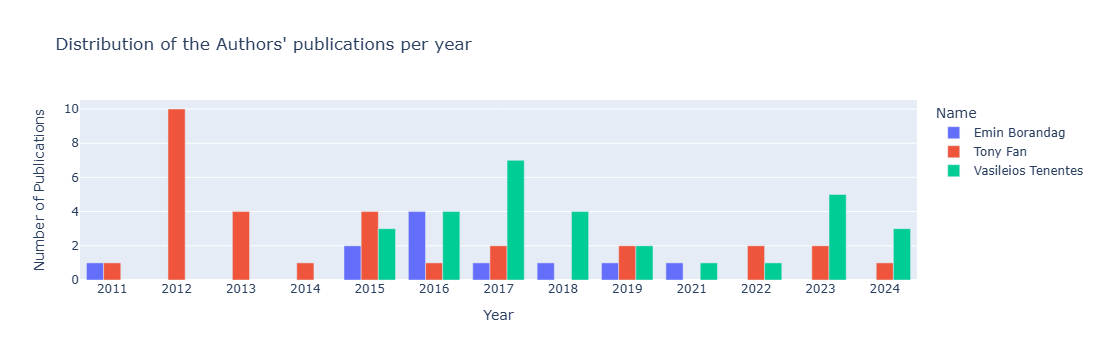

In [399]:
cumm_bar.show()

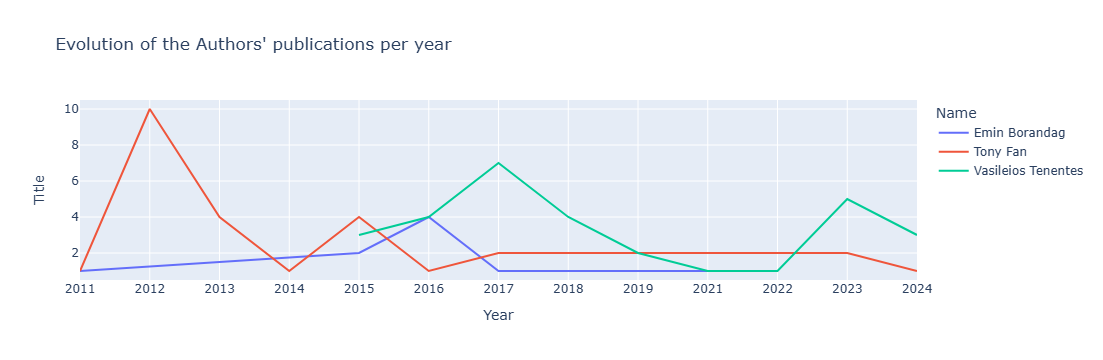

In [401]:
cumm_line.show()

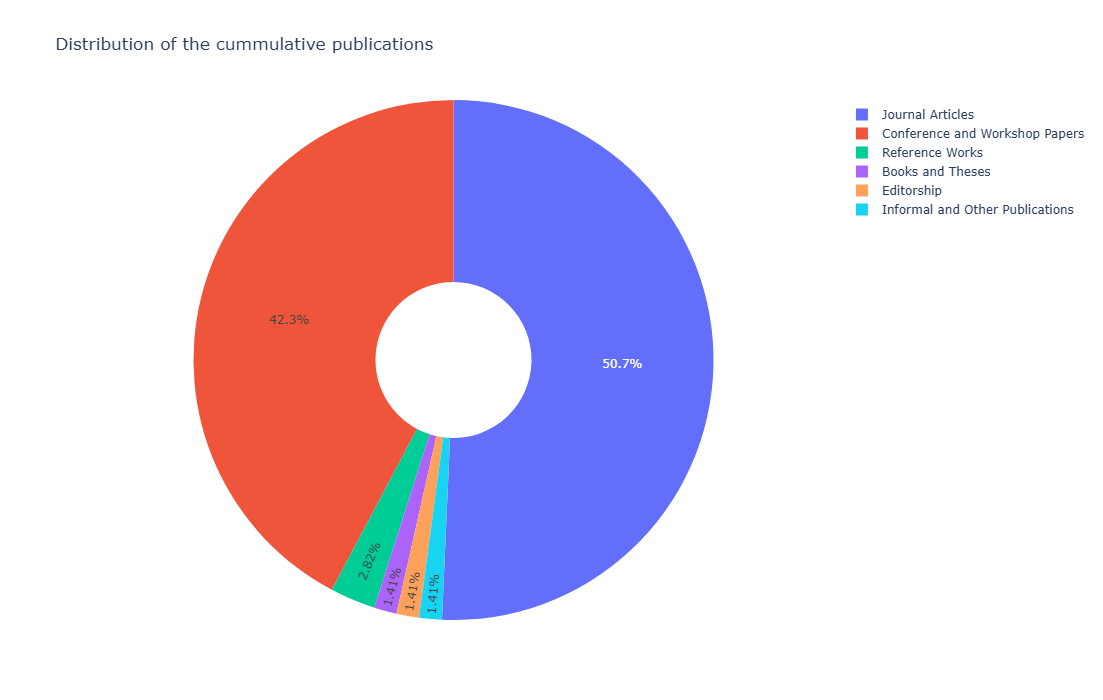

In [403]:
cumm_pie.show()